In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
def nested_dict(n, type):
    if n==1:
        defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

In [2]:
data = nested_dict(4, list)
z_all= [100, 50, 10, 6, 1, 0.5, 0]

data['bg']['cg'] =  np.loadtxt("./Cubic_galilan/CG/file__background.dat")
data['bg']['lcdm'] =  np.loadtxt("./Cubic_galilan/LCDM/file__background.dat")

for z in z_all:
    index = z_all.index(z);
    data['phi']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_phi.dat")
    data['delta']['cg']['z='+str(z)] = np.loadtxt("./Cubic_galilan/CG/pk00"+str(index)+"_delta.dat")
    
    data['phi']['lcdm']['z='+str(z)] = np.loadtxt("./Cubic_galilan/LCDM/pk00"+str(index)+"_phi.dat")
    data['delta']['lcdm']['z='+str(z)] = np.loadtxt("./Cubic_galilan/LCDM/pk00"+str(index)+"_delta.dat")


## Plots:

### Background

In [15]:
10**(2/3)

4.641588833612778

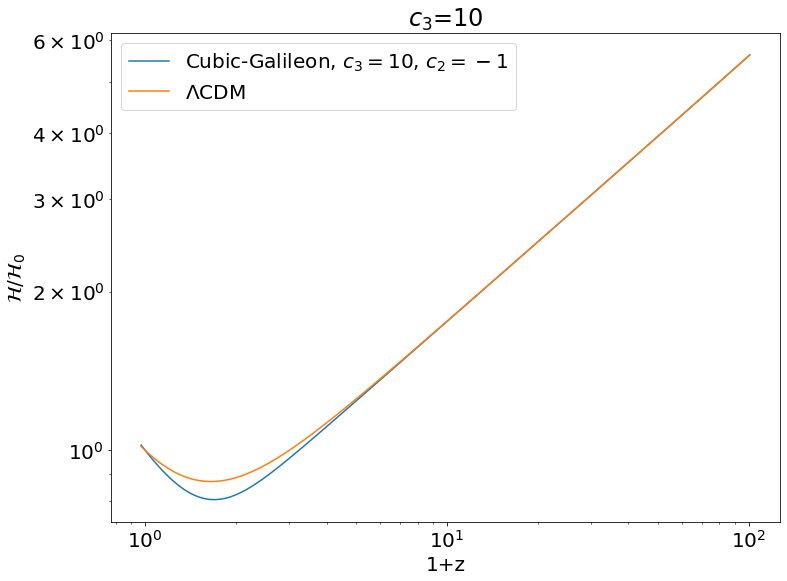

In [6]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(1./data['bg']['cg'][:,2], data['bg']['cg'][:,3], "-",  label = "Cubic-Galileon, $c_3=10$, $c_2 = -1$")
plt.loglog(1./data['bg']['lcdm'][:,2], data['bg']['lcdm'][:,3], "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("1+z")
plt.ylabel("$\mathcal{H}/\mathcal{H}_0$")
# plt.ylim(0.001, 0.5)
# plt.xlim(0.005, 0.8)
# plt.yscale('log')
plt.legend()

In [14]:
-5.378*(10**(2/3))

-24.962464747169523

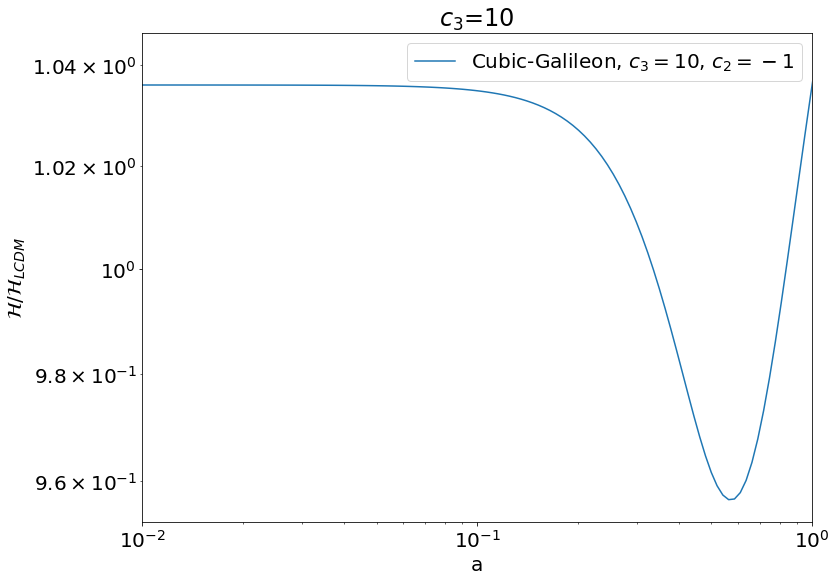

In [13]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

plt.loglog(data['bg']['cg'][:,2], (data['bg']['cg'][:,3]*data['bg']['cg'][-1:,3])/(data['bg']['lcdm'][:,3]*data['bg']['lcdm'][-1:,3])*1.03, "-",  label = "Cubic-Galileon, $c_3=10$, $c_2 = -1$")
# plt.loglog(1./data['bg']['lcdm'][:,2], , "-", label = "$\Lambda$CDM")


plt.title(r"$c_3 $=10")
plt.xlabel("a")
plt.ylabel("$\mathcal{H}/\mathcal{H}_{LCDM}$")
# plt.ylim(0.001, 0.5)
plt.xlim(0.01, 1.)
# plt.yscale('log')
plt.legend()

In [10]:
data['bg']['cg'][-1:,3]

array([1.023029])

In [11]:
data['bg']['lcdm'][-1:,3]

array([1.017128])

In [5]:
data['bg']['cg'][:,2]

array([0.00990099, 0.01030092, 0.01071701, 0.01114991, 0.0116003 ,
       0.01206888, 0.01255639, 0.0130636 , 0.0135913 , 0.01414032,
       0.01471153, 0.0153058 , 0.01592409, 0.01656735, 0.0172366 ,
       0.01793289, 0.01865731, 0.019411  , 0.02019514, 0.02101095,
       0.02185972, 0.02274279, 0.02366153, 0.02461738, 0.02561186,
       0.02664651, 0.02772296, 0.02884289, 0.03000808, 0.03122033,
       0.03248157, 0.03379375, 0.03515895, 0.0365793 , 0.03805704,
       0.03959447, 0.04119402, 0.04285819, 0.04458959, 0.04639094,
       0.04826507, 0.05021491, 0.05224352, 0.05435409, 0.05654992,
       0.05883447, 0.06121131, 0.06368418, 0.06625695, 0.06893366,
       0.07171852, 0.07461587, 0.07763029, 0.08076648, 0.08402938,
       0.0874241 , 0.09095596, 0.09463051, 0.09845352, 0.102431  ,
       0.1065691 , 0.1108744 , 0.1153537 , 0.1200139 , 0.1248624 ,
       0.1299068 , 0.135155  , 0.1406152 , 0.146296  , 0.1522063 ,
       0.1583554 , 0.164753  , 0.171409  , 0.1783339 , 0.18553

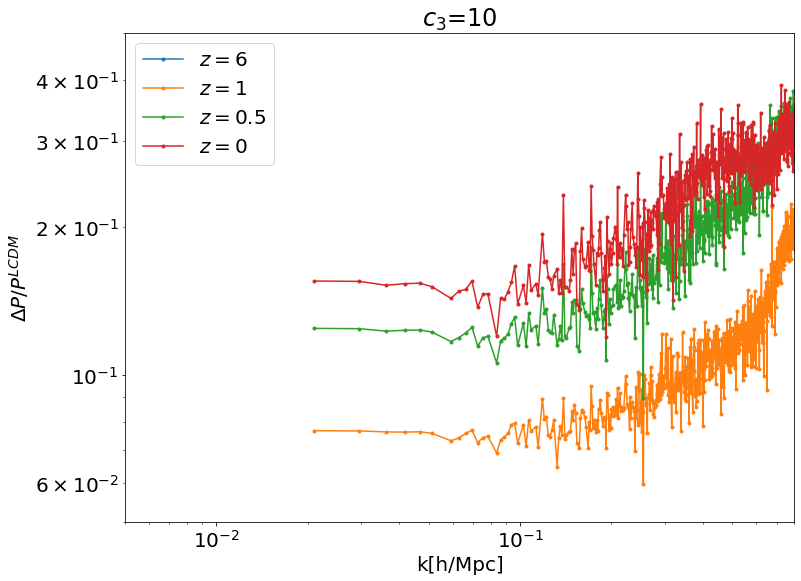

In [7]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(12,9))

for z in [6, 1,0.5,0]:

    k_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,0]
    p_ec_ref =  data['delta']['lcdm']['z='+str(z)][:,1]

    k_ec = data['delta']['cg']['z='+str(z)][:,0]
    pk_ec = data['delta']['cg']['z='+str(z)][:,1]

    plt.semilogx(k_ec_ref, (pk_ec/p_ec_ref)-1., ".-", label = "$z=$"+str(z))


    plt.title(r"$c_3 $=10")
    plt.xlabel("k[h/Mpc]")
    plt.ylabel("$\Delta P/P^{LCDM}}$")
    plt.ylim(0.05, 0.5)
    plt.xlim(0.005, 0.8)
    plt.yscale('log')
    plt.legend()
#     plt.savefig('H0rc1_z_'+str(z)+'.pdf', bbox_inches='tight')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


<Figure size 720x720 with 0 Axes>

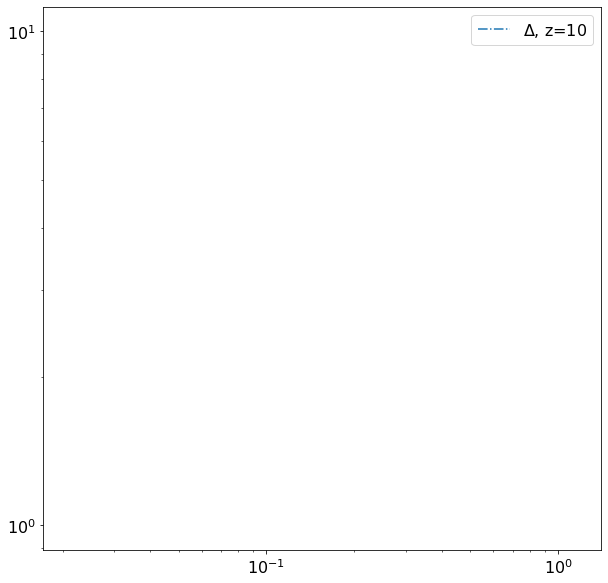

<Figure size 720x720 with 0 Axes>

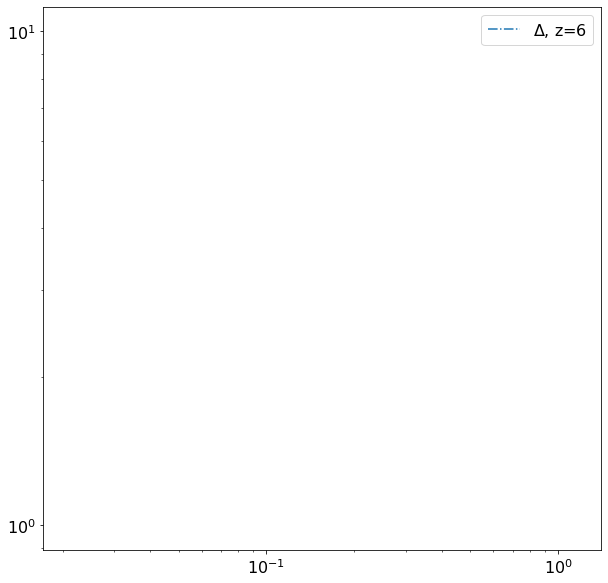

<Figure size 720x720 with 0 Axes>

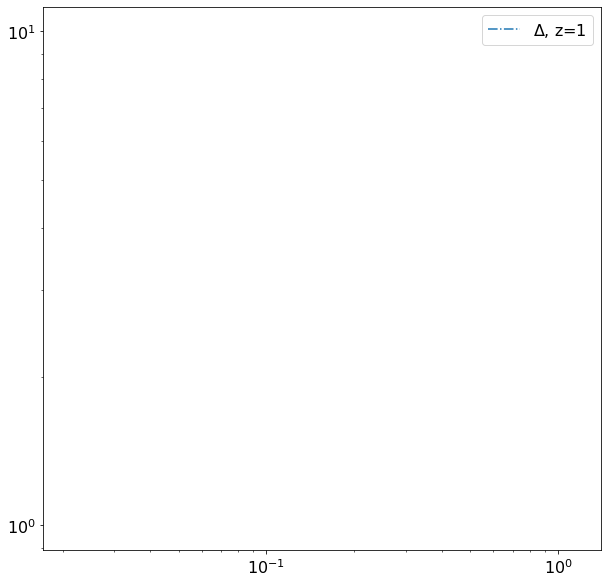

<Figure size 720x720 with 0 Axes>

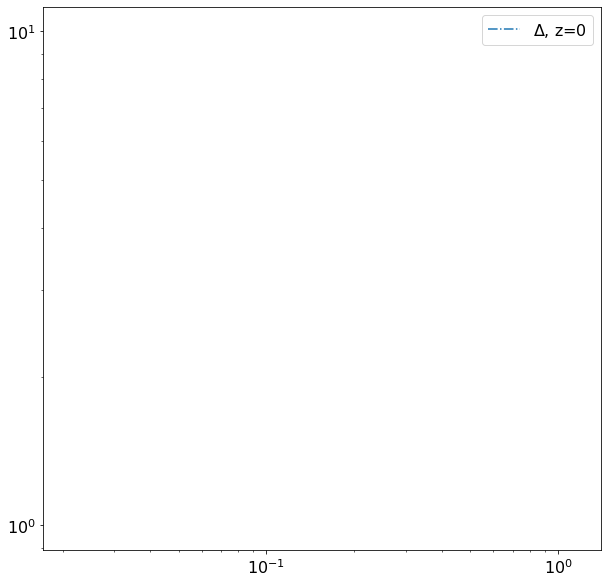

In [12]:
plt.rcParams['font.size'] = 16

for z in [10,6,1, 0]:
    fig = plt.figure(figsize=(10,10))
#     k = data['delta']['lcdm_ref']['z='+str(z)][:,0]
#     pk_ref = data['delta']['lcdm_ref']['z='+str(z)][:,1]
#     plt.loglog(k, pk_ref, "-")
    ###
#     k = data['delta']['lcdm']['z='+str(z)][:,0]
#     pk = data['delta']['lcdm']['z='+str(z)][:,1]
#     plt.loglog(k, pk , "-." ,label="Mg-evolution, z="+str(z))
#     plt.legend()

    fig = plt.figure(figsize=(10,10))
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk_ref = data['delta']['lcdm']['z='+str(z)][:,1]
    ###
    k = data['delta']['lcdm']['z='+str(z)][:,0]
    pk = data['delta']['lcdm']['z='+str(z)][:,1]
    plt.loglog(k, np.abs(pk-pk_ref)/pk_ref , "-." ,label=r"$\Delta$, z="+str(z))
    
    plt.legend()